<img src = 'https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true' width="240" height="360">
 
# EDA on Winequality's Data 



## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Description of the Datasets](#section301)<br>
  - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br>
4. [Data Preprocessing](#section4)<br>
  - 4.1 [Data Preprocessing](#section401)<br>
  - 4.2 [Pandas Profiling after Data Preprocessing](#section402)<br>
5. [Exploratory Data Analysis](#section5)<br>
  - 5.1 [**Analysis based on wine dataset**](#section501)<br>
    - 5.1.1 [How many unique value in wine?](#section50101)<br>
    - 5.1.2 [Alcohol Percent vs Wine Quality?](#section50102)<br>
    - 5.1.3 [Citric_Acid vs Wine Ratings?](#section50103)<br>
    - 5.1.4 [Free_Sulfur_Dioxide vs Wine Ratings?](#section50104)<br>
    - 5.1.5 [Sulphates vs Wine Ratings?](#section50105)<br>
    - 5.1.6 [pH vs Wine Ratings?](#section50106)<br>
    - 5.1.7 [Sugar Residual vs Wine Ratings?](#section50107)<br>
    - 5.1.8 [Volatile Acidity vs Wine Ratings?](#section50108)<br><br>
  6. [Conclusion](#section6)
  - 6.1 [Actionable Insights](#section601)

 <a id=section1></a>
## 1. Problem Statement

The **wines** having some many variants are available. The most combination of **physicochemical** can be give good wines. The combination can changes to produce good quality of wines across global.  The good qualities of wines are good for health for that, most of countries takes wines as soft drinks. Wine industry shows a recent growth spurt as social drinking is on the rise. The price of wine depends on concept of wine appreciation by wine tasters, Pricing of wine depends on such a volatile factor to some extent. Another key factor in wine certification and quality assessment is physicochemical tests which are laboratory-based and takes into account factors like acidity, pH level, the presence of sugar and other chemical properties


---

<a id=section2></a>
## 2. Importing Packages

In [1]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

C:\Users\BijayaSanjib\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')                  # To apply seaborn whitegrid style to the plots.
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [3]:
# Install and update plotly using this command to the latest version (higher than version 4.0.0)

!pip install plotly --upgrade

Requirement already up-to-date: plotly in c:\users\bijayasanjib\anaconda3\lib\site-packages (4.5.4)


In [12]:
# Install chart_studio, please use this command. 

!pip install chart-studio

In [3]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

---

<a id=section3></a>
## 3. Loading Data

### Importing Dataset

In [4]:
# Importing the dataset (Acidity Facts for winequality's dataset).

Project = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/winequality.csv')
Project.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


<a id=section301></a>
### Description of the Dataset

- This dataset provides a **contains** of different ingredients on the **Wine**. The major ingredients are sugar, alcohol and acid. Contains various information about physiochemical properties of wine.


| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| Fixed acidity                  | Amount of Tartaric Acid in wine, measured in g/dm3.                                        | 
| Volatile acidity               | Amount of Acetic Acid in wine, measured in g/dm3.                                          |
| Citric acid                    | Amount of citric acid in wine in measured in g/dm3. Contributes to crisoness of wine.      |
| Residual sugar                 | Amount of Sugar left in wine after fermentation. Measured in g/dm3.                        |
| Chlorides                      | Amount of Sodium cholride (salt) in wine. Measured in g/dm3.                               | | Free sulfur dioxide            | Amount of SO2 in free form. Measured in mg/dm3.                                            |
| Total sulfur dioxide           | Total amount of SO2. Too much SO2 can lead to a pungent smell. SO2 acts as antioxidant and | |                                | antimicrobial agent.                                                                       | | Density                        | Density of wine measured in g/dm3.                                                         |
| pH                             | pH of wine on a scale of 0 - 14. O means highly acidic and while 14 means highly basic.    | | Sulphates                      | Amount of potassium sulphate in wine, measured in g/dm3. Contributes to the formation of   | |                                | SO2.                                                                                       |  | Alcohol                        | Alcohol content in wine (in terms of % volume).                                            |
| Quality                        | Wine quality graded on a scale of 1 -10 (Higher is better).                                |
                                                              


In [136]:
Project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


- ```info``` function gives us the following insights into the df_menu dataframe:

  - There are a total of **6497 samples (rows)** and **12 columns** in the dataframe.
  
  - There are **12 columns** with a **numeric** datatype.
  
  - There are **0 missing** values in the data.

In [137]:
Project.describe ()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


- ```Describe``` function gives us the following insights into the data:
  
   - As we can see here, mean value is less than the median value of each column.
  
  - Similarly comparing the **75%** and **max** values of the other columns we can see that there are **outliers** present in some other columns.
  
  - There is a large difference between the 75th% tile and max values of residual sugar, free sulfur dioxide & total sulfur dioxide.
  


In [138]:
Project.shape

(6497, 12)

---

In [139]:
# Checking any missing data
Project.isnull () .any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

<a id=section302></a>
### 3.2 Pandas Profiling before Data Preprocessing

- Here, we will perform **Pandas Profiling before preprocessing** our dataset, so we will name the **output file** as __profiling_before_preprocessing.html__. 


- The file will be stored in the directory of your notebook. Open it using the jupyter notebook file explorer and take a look at it and see what insights you can develop from it. 


- Or you can **output the profiling report** in the **current jupyter notebook** as well as shown in the code below. 

In [23]:
# To install pandas profiling please run this command.

!pip install pandas-profiling

In [140]:
import pandas_profiling 

In [141]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html

profile = Project.profile_report(title='Pandas Profiling before Data Preprocessing')
profile.to_file(output_file="profiling_before_preprocessing.html")


# To output the pandas profiling report on the notebook.

'''Project.profile_report(title='Pandas Profiling before Data Preprocessing', style={'full_width':True})'''

"Project.profile_report(title='Pandas Profiling before Data Preprocessing', style={'full_width':True})"

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 12
- Number of observations: 6497
- Missing cells: 0


__Variables types__: 
- Numeric = 12
- Categorical = 0
- Text (Unique) = 0
- Rejected = 1

<br>


- **Volatile acidity** has a **skewness** of **1.495096542** and **kurtosis** of **1.495096542**.

- The distribution is **positive (right) skewed** as the **mean (0.3396659997)** is to the **right** of the **median (0.29)**.
  
 
- **Total sulfur dioxide** has a **skewness** of **0.4717306725** and **kurtosis** of **-0.3716636549**.
	
- **Citric Acid** has a **skewness** of **1.495096542** and **kurtosis** of **2.397239216**.

  
- All the **remaining columns** can be studied in the same way.


---

<a id=section4></a>
## 4. Data Preprocessing

<a id=section401></a>
### 4.1 Data Preprocessing

- Here we will perform **Data Preprocessing** on our dataset, to make the data usable for **EDA**.


- In order to avoid any errors, please run **Pandas Profiling** before running the code below.

In [142]:
Project.quality.unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [143]:
Project.quality.value_counts()

6    2836
5    2138
7    1079
4    216 
8    193 
3    30  
9    5   
Name: quality, dtype: int64

- '**counts gives us the following insights into the data By this we can judge most of the values are under 6,5,7 quality**'

In [144]:
#Number of uniquue value in each feature

for col in Project.columns.values:
    print("Number of unque values of {}: {}".format(col,Project[col].nunique()))

Number of unque values of fixed acidity: 106
Number of unque values of volatile acidity: 187
Number of unque values of citric acid: 89
Number of unque values of residual sugar: 316
Number of unque values of chlorides: 214
Number of unque values of free sulfur dioxide: 135
Number of unque values of total sulfur dioxide: 276
Number of unque values of density: 998
Number of unque values of pH: 108
Number of unque values of sulphates: 111
Number of unque values of alcohol: 111
Number of unque values of quality: 7


  -  The feature that has a maximum unique value is density.
  -  The feature that has a minimum unique value is quality.

In [145]:
# Renaming the attributes to remove the blank space between them.
Project.rename(columns = {'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity','citric acid':'citric_acid','residual sugar':'sugar_residual','free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide' },inplace = True) 
print(Project.columns) 

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'sugar_residual',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [146]:
Project.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
sugar_residual          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

---

<a id=section402></a>
### 4.2 Pandas Profiling after Data Preprocessing

- Here, we will perform **Pandas Profiling after preprocessing** our dataset, so we will name the **output file** as __profiling_after_preprocessing.html__.

In [147]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_after_preprocessing.html
profile = Project.profile_report(title='Pandas Profiling after Data Preprocessing')
profile.to_file(output_file="profiling_after_preprocessing.html")


# To output the pandas profiling report on the notebook.

'''Project.profile_report(title='Pandas Profiling after Data Preprocessing', style={'full_width':True})'''

"Project.profile_report(title='Pandas Profiling after Data Preprocessing', style={'full_width':True})"

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 12
- Number of observations: 6497
- Missing cells: 0


__Variables types__: 
- Numeric = 12
- Categorical = 0
- Text (Unique) = 0
- Rejected = 1


<br>

- **Sodium** has a **skewness** of **1.6021** and **kurtosis** of **3.3506**.

  - **Maximum value = 3600** is an **outlier**, as it lies far away from the **Q3 (75th percentile)** value **(790)**.

---

<a id=section5></a>
## 5. Exploratory Data Analysis

**Exploratory Data Analysis(EDA)** is an **approach to analyzing data sets** to **summarize** their **main characteristics**, often with **visual methods**. 


- It includes **cleaning, munging, combining, reshaping, slicing, dicing, and transforming data** for **analysis** purpose.


- The **primary goal of EDA** is to **maximize the analyst's insight into a data set** and into the **underlying structure of a data set**, while **providing all of the specific items** that an **analyst would want to extract from a data set**, such as:
 <br><br> 
  - A list of **outliers**.<br><br>
  
  - A **good-fitting model**.  <br><br>
  
  - **Estimates for parameters**.<br><br>
  
  - **Uncertainties** for those **estimates**.<br><br>
  
  - A **ranked list** of **important factors**.<br><br>
  
  - **Conclusions** as to whether **individual factors are statistically significant**.<br><br>
  
  - A **sense of robustness of conclusions**.<br><br>
  
  - **Optimal settings**.<br><br>

<a id=section501></a>
## 5.1 Analysis based on wine dataset

<a id=section50101></a>
### 5.1.1 How many unique value in wine?

In [148]:
#The unique values in quality attribute of the dataset
Project['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [149]:
#The unique values of quality attribute in a sorted manner.
Project.quality.value_counts().sort_index()

3    30  
4    216 
5    2138
6    2836
7    1079
8    193 
9    5   
Name: quality, dtype: int64

-    “quality” has a high number of values in categories 5, 6 and 7.
-    Only a few observations are there for the categories 3 & 9.

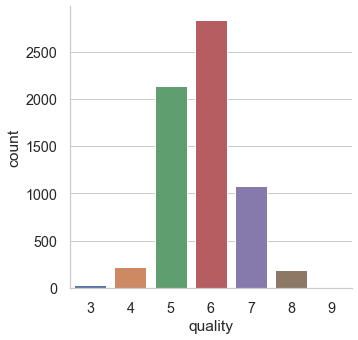

In [150]:
#The countplot function gives a countplot graph of desired attribute
sns.catplot (x='quality',data=Project,kind='count')

-    The above distribution shows the quality range from 3 - 9.

In [151]:
# The range of descretion are as follows in 'Inferior 1 - 4', 'Fine 5 - 6', and 'Superior 7 - 9'.
conditions = [
    (Project ['quality'] >= 7),
    (Project ['quality'] <= 4)
]
rating = ['Superior', 'Inferior']
Project ['rating'] = np.select (conditions, rating, default = 'Fine')
Project.rating.value_counts()

Fine        4974
Superior    1277
Inferior    246 
Name: rating, dtype: int64

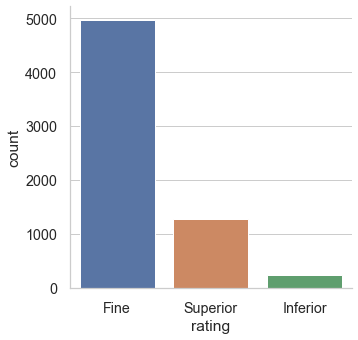

In [152]:
#The countplot function gives a countplot graph of rating attribute
sns.catplot (x='rating',data=Project, kind='count')

In [153]:
Project.groupby('rating').mean()

,fixed_acidity,volatile_acidity,citric_acid,sugar_residual,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
Fine,7.241536,0.346423,0.316765,5.659087,0.058674,30.766285,117.744069,0.995113,3.215346,0.529908,10.265275,5.570165
Inferior,7.357724,0.465163,0.273374,4.273984,0.062126,22.902439,105.701220,0.994944,3.234797,0.505732,10.184350,3.878049
Superior,7.085709,0.289170,0.334628,4.827721,0.044576,31.055208,109.891151,0.993027,3.227651,0.541488,11.433359,7.158966


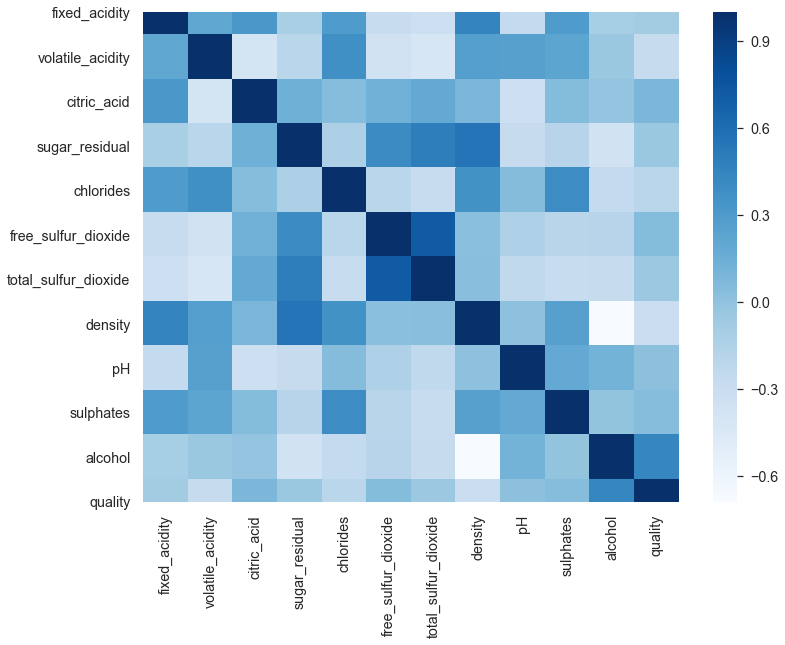

In [154]:
# Heatmap plot without values
correlation = Project.corr()
plt.figure (figsize = (12,9))
sns.heatmap(correlation, vmax=1, annot=False, linewidth=0, square=False, cmap ="Blues")
plt.show()

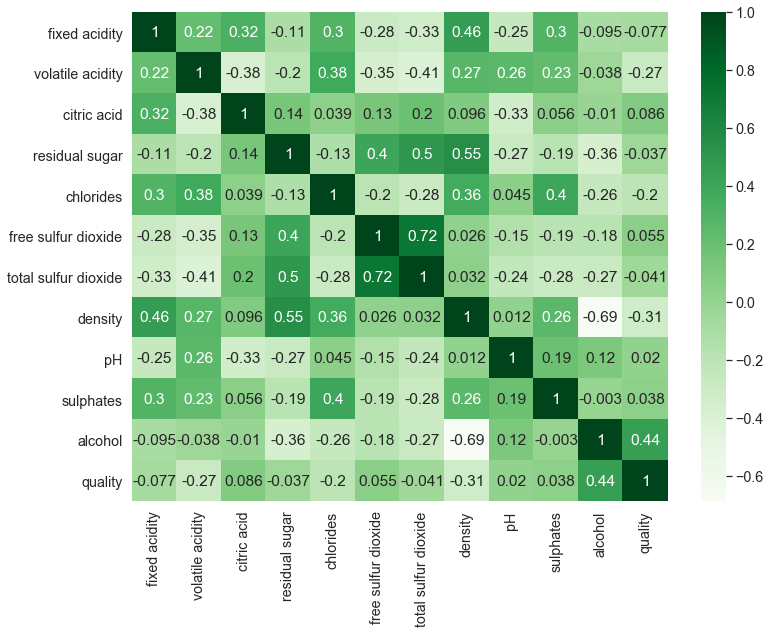

In [5]:
# Heatmap plot with values
correlation = Project.corr()
plt.figure (figsize = (12,9))
sns.heatmap(correlation, vmax=1, annot=True, linewidth=0, square=False, cmap ="Greens")
plt.show()

-  Density has a strong positive correlation with residual sugar, whereas it has a strong negative correlation with alcohol.
-  pH & fixed acidity has negative correlation.
-  Density & fixed acidity has positive correlation.
-  citric acid & fixed acidity has positive correlation.
-  citric acid & volatile acidity has negative correlation.
-  free sulphur dioxide & total sulphur dioxide has positive correlation.

In [156]:
# Checking the correlation with qualityin ascending order.
correlation['quality'].sort_values (ascending=False)

quality                 1.000000
alcohol                 0.444319
citric_acid             0.085532
free_sulfur_dioxide     0.055463
sulphates               0.038485
pH                      0.019506
sugar_residual         -0.036980
total_sulfur_dioxide   -0.041385
fixed_acidity          -0.076743
chlorides              -0.200666
volatile_acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

- The main attributes alcohol, citric_acid, free_sulfur_dioxide, sulphates, pH have maximum correlation with quality attribute.

<a id=section50102></a>
### 5.1.2 Alcohol Percent vs Wine Quality?

[Text(0, 0.5, 'Alcohol Percent'),
 Text(0.5, 0, 'Quality'),
 Text(0.5, 1.0, 'Alcohol percent in different quality sets')]

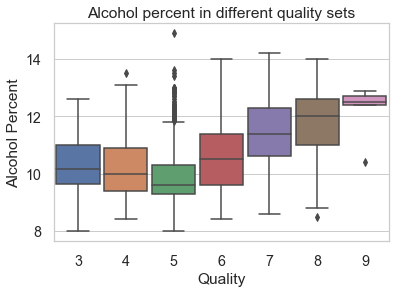

In [157]:
# Box plot.
box=sns.boxplot(x='quality', y='alcohol', data = Project, width=0.9)
box.set(xlabel='Quality', ylabel='Alcohol Percent', title='Alcohol percent in different quality sets')

Text(0.5, 1.0, 'Showing the variation of Quality with Alcohol percent')

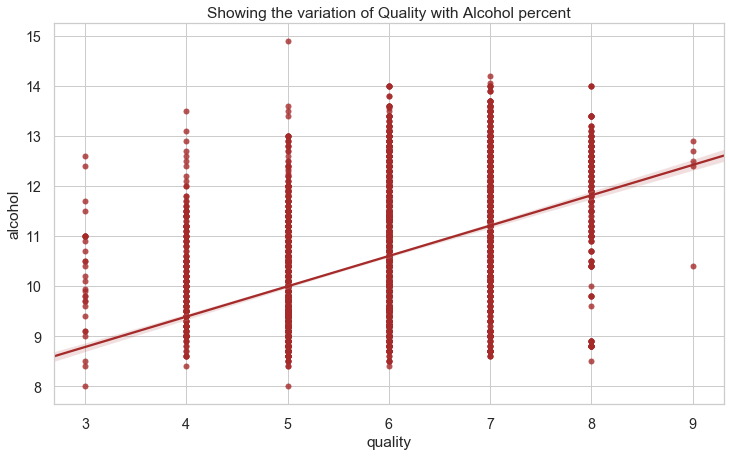

In [158]:
plt.figure(figsize=(12,7))
sns.regplot(data=Project, x='quality', y='alcohol', color='brown')

plt.title('Showing the variation of Quality with Alcohol percent')

<a id=section50103></a>
### 5.1.3 Citric_Acid vs Wine Ratings

[Text(0, 0.5, 'Citric_Acid'),
 Text(0.5, 0, 'Ratings'),
 Text(0.5, 1.0, 'Citric_Acid in Ratings')]

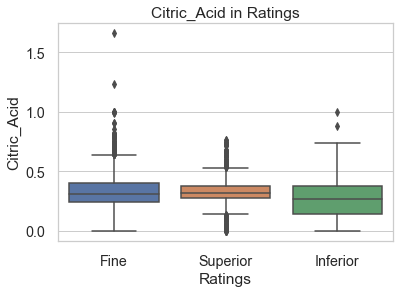

In [159]:
# Box plot.
box=sns.boxplot(x='rating', y='citric_acid', data = Project)
box.set(xlabel='Ratings', ylabel='Citric_Acid', title='Citric_Acid in Ratings')

Text(0.5, 1.0, 'Showing the variation of Quality with Citric Acid')

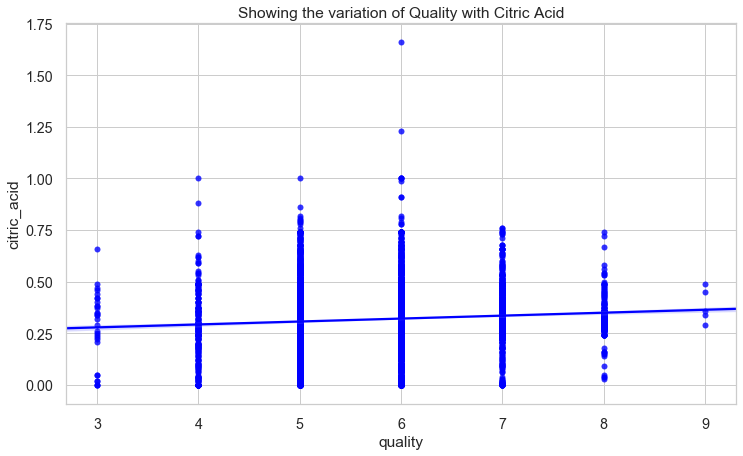

In [161]:
plt.figure(figsize=(12,7))
sns.regplot(data=Project, x='quality', y='citric_acid', color='blue')

plt.title('Showing the variation of Quality with Citric Acid')

<a id=section50104></a>
### 5.1.4 Free_Sulfur_Dioxide vs Wine Ratings

[Text(0, 0.5, 'Free_Sulfur_Dioxide'),
 Text(0.5, 0, 'Ratings'),
 Text(0.5, 1.0, 'Free_Sulfur_Dioxide in different Ratings')]

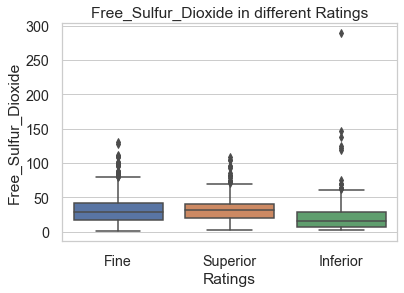

In [162]:
# Box plot.
box=sns.boxplot(x='rating', y='free_sulfur_dioxide', data = Project)
box.set(xlabel='Ratings', ylabel='Free_Sulfur_Dioxide', title='Free_Sulfur_Dioxide in different Ratings')

Text(0.5, 1.0, 'Showing the variation of Quality with free_sulfur_dioxide is present')

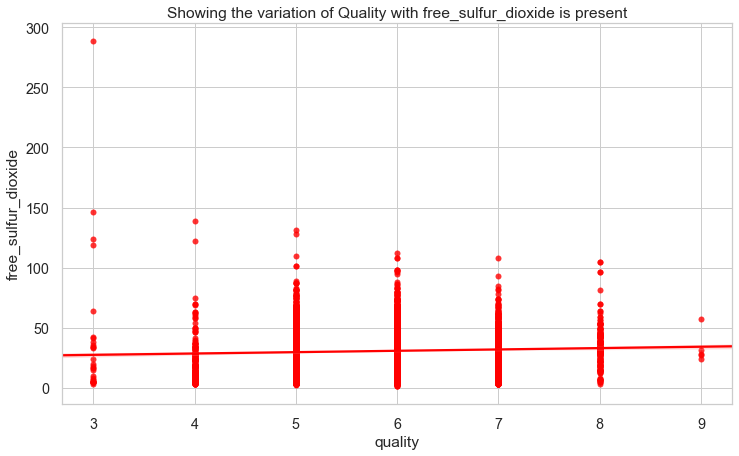

In [164]:
plt.figure(figsize=(12,7))
sns.regplot(data=Project, x='quality', y='free_sulfur_dioxide', color='red')

plt.title('Showing the variation of Quality with free_sulfur_dioxide is present')

<a id=section50105></a>
### 5.1.5 Sulphates vs Wine Ratings

[Text(0, 0.5, 'Sulphates'),
 Text(0.5, 0, 'Ratings'),
 Text(0.5, 1.0, 'Sulphates in different Ratings')]

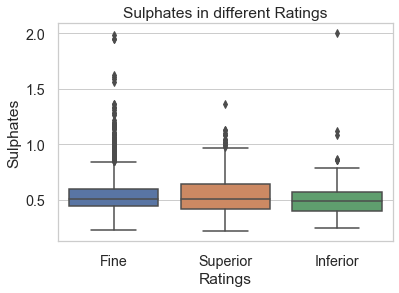

In [165]:
# Box plot.
box=sns.boxplot(x='rating', y='sulphates', data = Project)
box.set(xlabel='Ratings', ylabel='Sulphates', title='Sulphates in different Ratings')

Text(0.5, 1.0, 'Showing the variation of Quality with sulphates is present')

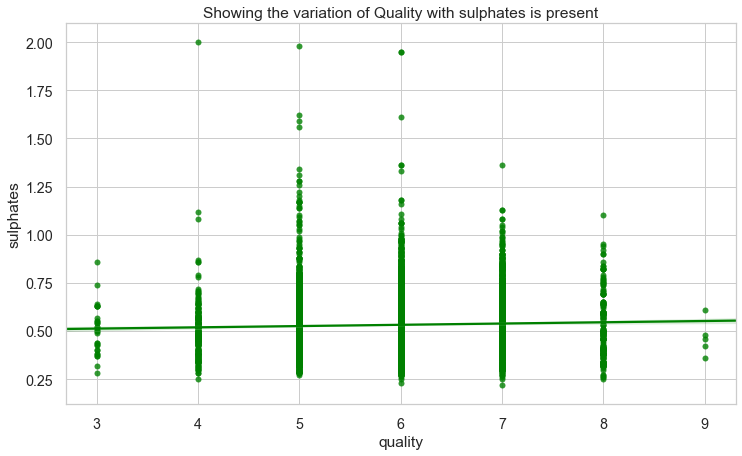

In [166]:
plt.figure(figsize=(12,7))
sns.regplot(data=Project, x='quality', y='sulphates', color='green')

plt.title('Showing the variation of Quality with sulphates is present')

<a id=section50106></a>
### 5.1.6 pH vs Wine Ratings

[Text(0, 0.5, 'pH'),
 Text(0.5, 0, 'Ratings'),
 Text(0.5, 1.0, 'PH in different Ratings')]

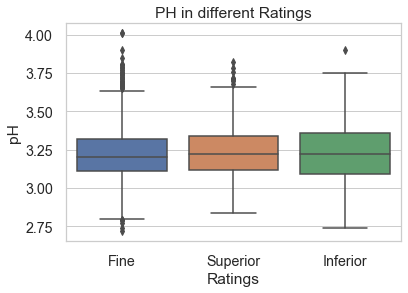

In [167]:
# Box plot.
box=sns.boxplot(x='rating', y='pH', data = Project)
box.set(xlabel='Ratings', ylabel='pH', title='PH in different Ratings')

Text(0.5, 1.0, 'Showing the variation of Quality with pH is present')

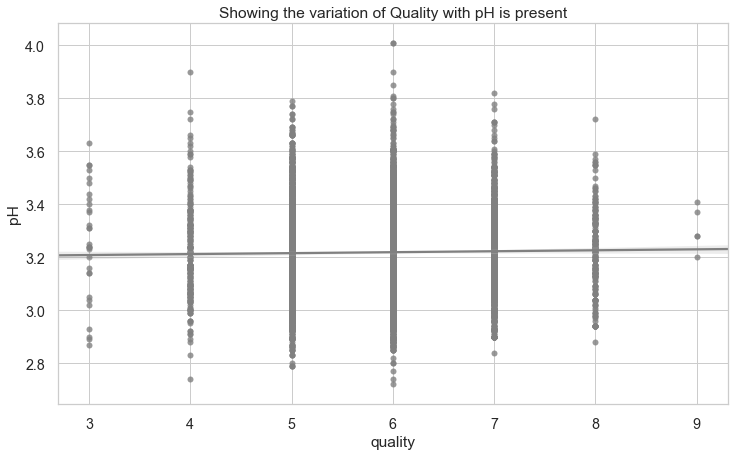

In [168]:
plt.figure(figsize=(12,7))
sns.regplot(data=Project, x='quality', y='pH', color='grey')

plt.title('Showing the variation of Quality with pH is present')

<a id=section50107></a>
### 5.1.7 Sugar Residual vs Wine Ratings

[Text(0, 0.5, 'Sugar Residual'),
 Text(0.5, 0, 'Ratings'),
 Text(0.5, 1.0, 'Sugar Residual in different Ratings')]

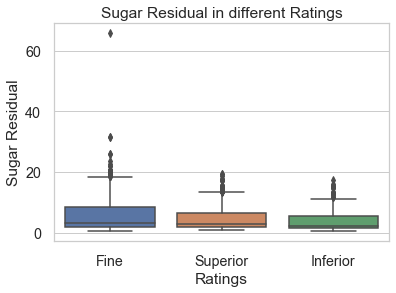

In [169]:
# Box plot.
box=sns.boxplot(x='rating', y='sugar_residual', data = Project)
box.set(xlabel='Ratings', ylabel='Sugar Residual', title='Sugar Residual in different Ratings')

Text(0.5, 1.0, 'Showing the variation of Quality with Sugar Residual is present')

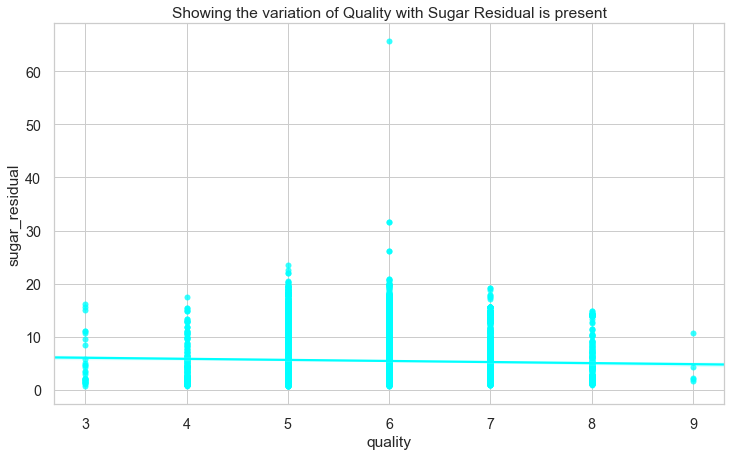

In [172]:
plt.figure(figsize=(12,7))
sns.regplot(data=Project, x='quality', y='sugar_residual', color='cyan')

plt.title('Showing the variation of Quality with Sugar Residual is present')

<a id=section50108></a>
### 5.1.8 Volatile Acidity vs Wine Ratings

[Text(0, 0.5, 'volatile acidity'),
 Text(0.5, 0, 'Ratings'),
 Text(0.5, 1.0, 'volatile_acidity in different Ratings')]

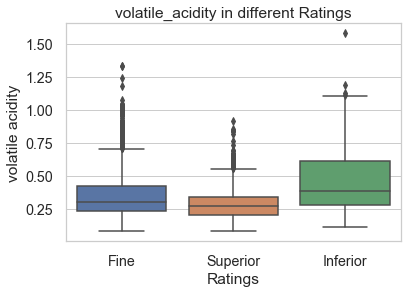

In [174]:
# Box plot.
box=sns.boxplot(x='rating', y='volatile_acidity', data = Project)
box.set(xlabel='Ratings', ylabel='volatile acidity', title='volatile_acidity in different Ratings')

Text(0.5, 1.0, 'Showing the variation of Quality with Volatile Acidity is present')

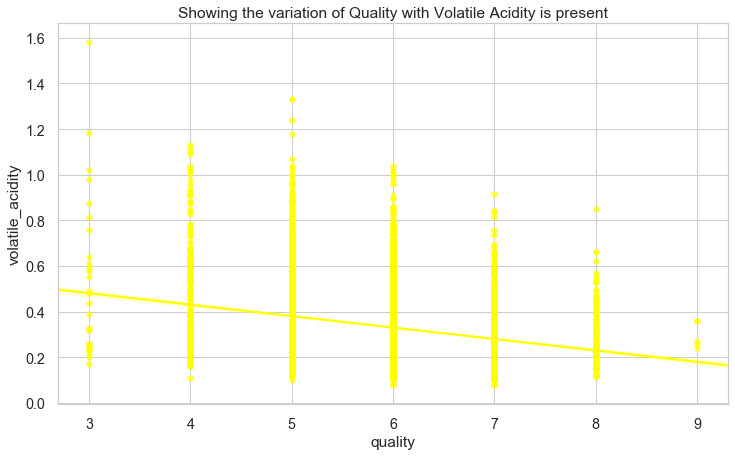

In [176]:
plt.figure(figsize=(12,7))
sns.regplot(data=Project, x='quality', y='volatile_acidity', color='yellow')

plt.title('Showing the variation of Quality with Volatile Acidity is present')

<a id=section6></a>
## 6. Conclusion

- The analysis helps us to understand whether by modifying the variables, it is possible to increase the quality of the wine on the market. So we can control other variables, then you can predict the quality of your wine and obtain more profits. 

- By plotting the graph, we got to know the relation between different variables to determine the factors that have a larger impact. 

- Now if alcohol, citric acid level increases then Quality also increases, so direct proportionally impact. 

- The chlorides, volatile acidity level decreases then Quality are increases, so indirect proportionally impact. 

<a id=section601></a>
### 6.1 Actionable Insights

- In order to **profit** the wine business ** increases the alcohol, citric acid level **. As more alcohol percent in the wine ** the wine quality move from “Fine” to “Superior”.

- In order to **profit** the wine business ** decreases the density, volatile acidity level **. As less density, volatile acidity level in the wine ** the wine quality move from “Fine” to “Superior”.
